In [6]:
from sklearn.cluster import KMeans 
import numpy as nm    
import matplotlib.pyplot as plt 
import pandas as pd    


In [10]:
df = pd.read_csv('../input/mall-customers/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'spending amount')

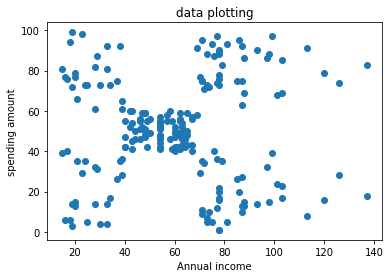

In [12]:
x = df.iloc[:, [3, 4]].values  
#print(x)
plt.title('data plotting')
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual income')
plt.ylabel('spending amount')


In [16]:
kmeans = KMeans(n_clusters=5)  

#training the K-means model on a dataset  
 
y_predict= kmeans.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])  

y_predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [18]:
df['cluster']=y_predict
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [21]:
#visulaizing the clusters  
kmeans.cluster_centers_



array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [22]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

In [23]:
df1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
43,44,Female,31,39,61,0
46,47,Female,50,40,55,0
47,48,Female,27,40,47,0
48,49,Female,29,40,42,0
49,50,Female,31,40,42,0
...,...,...,...,...,...,...
121,122,Female,38,67,40,0
122,123,Female,40,69,58,0
126,127,Male,43,71,35,0
132,133,Female,25,72,34,0


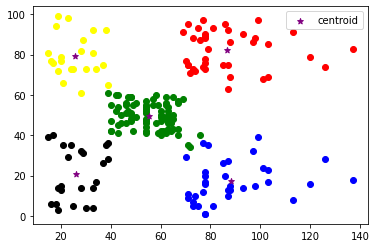

In [35]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='yellow')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [37]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

In [38]:
sse

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25011.920255473764,
 22830.10333064867]

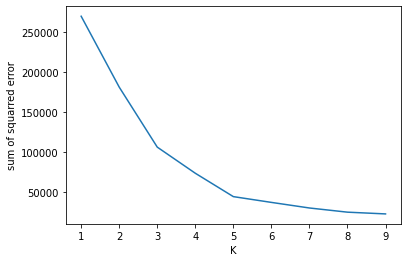

In [39]:
plt.xlabel('K')
plt.ylabel('sum of squarred error')
plt.plot(k_rng,sse)

In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.335000
std,57.879185,13.969007,26.264721,25.823522,1.397332
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,2.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000
